# Stock Market Data Preparation

In [1]:
import yfinance as yf
import COVID19Py
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
import seaborn as sns
sns.set(style="white", color_codes=True)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000



In [2]:
# Reference  [https://en.wikipedia.org/wiki/List_of_S%26P_500_companies]
companies = pd.read_csv("../../data/sp500_company_list.csv")
companies.columns =[column.replace(" ", "_").lower() for column in companies.columns]
companies.head()

symbol             security sec_filings             gics_sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                gics_sub_industry     headquarters_location date_first_added  \
0        Industrial Conglomerates     Maplewood, Minnesota        1976/08/09   
1           Health Care Equipment  North Chicago, Illinois        1964/03/31   
2                 Pharmaceuticals  North Chicago, Illinois        2012/12/31   
3           Health Care Equipment   Danvers, Massachusetts        2018/05/31   
4  IT Consulting & Other Services          Dublin, Ireland        2011/07/06   

       cik      founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   815094         1981  
4  1467373         1989

In [4]:
sp_tickers = set(companies['symbol'])
gics_sectors = companies['gics_sector'].unique()
gics_sub_industries = companies['gics_sub_industry'].unique()

aerospace_companies = companies[companies['gics_sub_industry'].str.contains('Aerospace')]
companies[companies['gics_sector']=='Communication Services'].head()

cosmetic_tickers = set(['KAOOY','KSRYY','SSDOY','ULTA','BDRFY','EL','LRLCY'])

company_tickers = sp_tickers.union(cosmetic_tickers)

In [5]:
ticker_string = ' '.join(list(company_tickers))
stock_data = yf.download(ticker_string, start="2019-11-01", end="2020-05-05") # Data from the last 6 months

[*********************100%***********************]  510 of 510 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [6]:
print(f"stock_data columns_first: {set([x[0] for x in stock_data.columns])}")
print(f"stock_data columns_second: tickers of the companies")
print(f"stock_data rows are indexed by dates")
stock_data.info()


stock_data columns_first: {'Volume', 'Low', 'High', 'Close', 'Open', 'Adj Close'}
stock_data columns_second: tickers of the companies
stock_data rows are indexed by dates
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2019-10-31 to 2020-05-04
Columns: 3060 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(2556), int64(504)
memory usage: 3.0 MB


In [7]:
# Append the return of price increase data in stock dataframe

for c in stock_data['Open'].columns:
    stock_data['Return', c] = (stock_data['Close'][c] - stock_data['Open'][c]) / stock_data['Open'][c]

stock_data.head()

Adj Close                                                \
                    A        AAL         AAP        AAPL       ABBV   
Date                                                                  
2019-10-31  75.398499  29.852554  161.960739  246.760193  77.336182   
2019-11-01  76.612839  30.349104  164.293274  253.763443  79.474953   
2019-11-04  76.383896  30.736416  166.077545  255.429932  80.680443   
2019-11-05  75.199425  31.065199  167.602646  255.062927  79.562439   
2019-11-06  75.438309  30.846008  169.157654  255.172012  79.795769   

                                                                      \
                  ABC        ABMD        ABT         ACN        ADBE   
Date                                                                   
2019-10-31  84.610817  207.580002  82.907265  183.876236  277.929993   
2019-11-01  86.087402  216.789993  81.965248  186.652924  277.820007   
2019-11-04  86.711731  220.419998  81.528946  186.236435  277.500000   
2019-11-05  85.354065  217.539993  81.647934  185.324081  289.290009   
2019-11-06  83.946861  214.610001  82.421387  187.654526  287.399994   

                                                                       \
                   ADI        ADM         ADP         ADS        ADSK   
Date                                                                    
2019-10-31  105.553673  41.372967  160.355255   98.822113  147.360001   
2019-11-01  108.266022  41.756775  161.096588   99.869621  150.250000   
2019-11-04  110.265625  42.376781  160.009308  101.124672  151.270004   
2019-11-05  112.304832  42.288208  155.195572  102.656410  151.729996   
2019-11-06  110.899162  42.199638  157.814957  102.429123  151.509995   

                                                                               \
                  AEE        AEP        AES        AFL         AGN        AIG   
Date                                                                            
2019-10-31  76.718605  92.204193  16.760698  52.615646  174.057556  51.972164   
2019-11-01  76.382896  91.393410  17.212894  53.061043  176.212128  52.757240   
2019-11-04  75.128937  90.651009  17.124422  52.902679  176.716202  53.905418   
2019-11-05  74.013214  89.283440  16.898323  52.397900  176.330765  53.787659   
2019-11-06  74.605637  89.849998  17.380009  53.150120  176.469116  54.484413   

                                                                    \
                  AIV         AIZ        AJG       AKAM        ALB   
Date                                                                 
2019-10-31  54.068020  124.911270  90.411621  86.500000  60.068222   
2019-11-01  54.412838  126.526283  90.708961  87.500000  63.776749   
2019-11-04  53.959644  125.466118  89.816940  87.510002  66.951241   
2019-11-05  52.836517  125.020256  89.182617  87.790001  66.624901   
2019-11-06  52.757698  126.377670  90.827904  87.400002  65.982086   

                                                                       \
                  ALGN        ALK         ALL        ALLE        ALXN   
Date                                                                    
2019-10-31  252.289993  68.695152  105.427040  115.453918  105.400002   
2019-11-01  257.040009  69.407532  104.911888  117.593071  109.379997   
2019-11-04  258.769989  69.882446  105.496391  117.533363  108.529999   
2019-11-05  257.910004  70.624512  104.852448  116.508568  107.230003   
2019-11-06  256.160004  70.614624  105.952087  115.991196  106.629997   

                                                                               \
                 AMAT      AMCR        AMD        AME        AMGN         AMP   
Date                                                                            
2019-10-31  53.903160  9.301155  33.930000  91.304062  210.349213  149.105942   
2019-11-01  55.095268  9.506327  34.889999  93.844437  214.985275  152.059814   
2019-11-04  55.373428  9.662649  36.290001  95.259087  211.493423  154.496506   


In [8]:
company_stock_data = stock_data.copy()
company_stock_data.columns = company_stock_data.columns.swaplevel()
company_stock_data.tail()

A       AAL         AAP        AAPL       ABBV        ABC  \
            Adj Close Adj Close   Adj Close   Adj Close  Adj Close  Adj Close   
Date                                                                            
2020-04-28  75.449997     11.26  120.970001  277.827911  82.760002  89.529999   
2020-04-29  78.720001     12.63  124.910004  286.953247  83.760002  89.339996   
2020-04-30  76.660004     12.01  120.910004  293.006836  82.199997  89.660004   
2020-05-01  74.209999     10.64  116.589996  288.289612  82.839996  86.379997   
2020-05-04  74.559998      9.82  120.110001  292.368561  81.860001  86.419998   

                  ABMD        ABT         ACN        ADBE         ADI  \
             Adj Close  Adj Close   Adj Close   Adj Close   Adj Close   
Date                                                                    
2020-04-28  164.399994  91.459999  178.360001  333.450012  107.610001   
2020-04-29  169.279999  92.279999  187.559998  349.170013  113.339996   
2020-04-30  191.250000  92.089996  185.190002  353.640015  109.599998   
2020-05-01  183.490005  89.849998  180.089996  343.839996  103.639999   
2020-05-04  181.000000  89.830002  179.529999  349.109985  103.400002   

                  ADM         ADP        ADS        ADSK        AEE  \
            Adj Close   Adj Close  Adj Close   Adj Close  Adj Close   
Date                                                                  
2020-04-28  37.169998  143.009995  47.599998  177.309998  74.250000   
2020-04-29  38.410000  145.839996  54.939999  187.899994  74.620003   
2020-04-30  37.139999  146.690002  50.070000  187.130005  72.750000   
2020-05-01  35.119999  140.419998  46.380001  174.899994  71.449997   
2020-05-04  34.759998  144.479996  46.340000  177.800003  71.440002   

                  AEP        AES        AFL         AGN        AIG        AIV  \
            Adj Close  Adj Close  Adj Close   Adj Close  Adj Close  Adj Close   
Date                                                                            
2020-04-28  83.878403  13.493891  37.790001  187.350006  25.280001  37.209999   
2020-04-29  82.391724  14.176999  39.189999  189.289993  27.230000  38.009998   
2020-04-30  82.371902  13.250000  37.240002  187.339996  25.430000  37.669998   
2020-05-01  80.667175  12.940000  36.619999  189.740005  23.900000  36.470001   
2020-05-04  82.312439  12.810000  35.750000  188.699997  24.070000  36.410000   

                   AIZ        AJG        AKAM        ALB        ALGN  \
             Adj Close  Adj Close   Adj Close  Adj Close   Adj Close   
Date                                                                   
2020-04-28  109.580002  77.220001  101.930000  64.309998  203.509995   
2020-04-29  109.730003  79.669998   97.870003  64.669998  220.580002   
2020-04-30  106.239998  78.500000   97.709999  61.430000  214.850006   
2020-05-01  102.320000  77.510002   95.860001  57.439999  203.259995   
2020-05-04  100.000000  80.139999   97.599998  57.259998  210.139999   

                  ALK         ALL        ALLE        ALXN       AMAT  \
            Adj Close   Adj Close   Adj Close   Adj Close  Adj Close   
Date                                                                   
2020-04-28  31.580000  101.839996  101.620003  106.919998  50.419998   
2020-04-29  34.000000  105.820000  102.360001  108.449997  54.340000   
2020-04-30  32.520000  101.720001  100.540001  107.470001  49.680000   
2020-05-01  30.110001   99.739998   97.480003  103.910004  46.889999   
2020-05-04  28.770000  100.339996   94.760002  103.839996  47.580002   

                AMCR        AMD        AME        AMGN         AMP  \
           Adj Close  Adj Close  Adj Close   Adj Close   Adj Close   
Date                                                                 
2020-04-28      9.02  55.509998  80.760002  237.669998  113.480003   
2020-04-29      9.24  53.660000  84.500000  235.690002  118.019997   
2020-04-30      8.97  52.389999  83.870003  239.220001  114.9400

In [9]:
company_stock_data['AMZN'].head()

Adj Close        Close         High          Low         Open  \
Date                                                                          
2019-10-31  1776.660034  1776.660034  1792.000000  1771.479980  1775.989990   
2019-11-01  1791.439941  1791.439941  1797.449951  1785.209961  1788.010010   
2019-11-04  1804.660034  1804.660034  1815.060059  1801.010010  1801.010010   
2019-11-05  1801.709961  1801.709961  1810.250000  1794.000000  1809.160034   
2019-11-06  1795.770020  1795.770020  1802.500000  1788.579956  1801.000000   

             Volume    Return  
Date                           
2019-10-31  2781200  0.000377  
2019-11-01  2790400  0.001918  
2019-11-04  2771900  0.002027  
2019-11-05  1885500 -0.004118  
2019-11-06  2029800 -0.002904

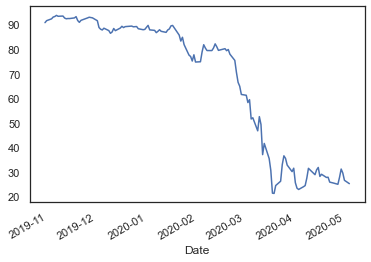

In [10]:
company_stock_data['UAL']['Adj Close'].plot.line()

# COVID-19 Data Preparation

In [11]:
"""
    jhu(default) - https://github.com/CSSEGISandData/COVID-19 - Worldwide Data repository operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).

    csbs - https://www.csbs.org/information-covid-19-coronavirus - U.S. County data that comes from the Conference of State Bank Supervisors.

    nyt - https://github.com/nytimes/covid-19-data - The New York Times is releasing a series of data files with cumulative counts of coronavirus cases in the United States. This API provides the timeseries at the US county level.
"""

covid19 = COVID19Py.COVID19(data_source="jhu")
covid_data = covid19.getAll(timelines=True)

In [12]:
covid_country_names = set([x['country'] for x in covid_data["locations"]])
covid_country_names

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [13]:
from datetime import datetime, timedelta

def utc_string_to_date(s, tz):
    # 
    datetime_object = datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ')
    if tz < 0:
        datetime_object = datetime_object- timedelta(days=1)
    return datetime_object.strftime("%Y-%m-%d")

# utc_string_to_date("2020-05-01T00:00:00Z", -4)

def update_utc_datetime_keys(d, tz):
    ret = {}
    for k in d.keys():
        nk = utc_string_to_date(k, tz)
        ret[nk] = d[k]
    return ret
# update_utc_datetime_keys({"2020-05-01T00:00:00Z": 1}, -4)


In [14]:
# Returns df of confirmed and deaths per day and summary in python dictionary.
# Timezone
def covid_data_by_country_code(code, tz=-4): 
    country_covid_data = [x for x in covid_data["locations"] if x['country'] == code][0]

    confirmed_timeline = country_covid_data['timelines']['confirmed']['timeline']
    deaths_timeline = country_covid_data['timelines']['deaths']['timeline']

    # Update Keys to Date Strings
    confirmed_timeline = update_utc_datetime_keys(confirmed_timeline, tz)
    deaths_timeline = update_utc_datetime_keys(deaths_timeline, tz)
    
    confirmed_df = pd.DataFrame.from_dict(data=confirmed_timeline, orient='index', columns=['confirmed'])
    deaths_df = pd.DataFrame.from_dict(data=deaths_timeline, orient='index', columns=['deaths'])
    timeline_df = pd.concat([confirmed_df, deaths_df], axis=1)
    
    timeline_df['confirmed_inc'] =timeline_df['confirmed']
    timeline_df['confirmed_inc_rate'] =timeline_df['confirmed']
    timeline_df['deaths_inc'] = timeline_df['deaths']
    timeline_df['deaths_inc_rate'] = timeline_df['deaths']
    
    for i in range(1, len(timeline_df)):
        for ch in ['confirmed', 'deaths']:
            ci = timeline_df.columns.get_loc(f"{ch}_inc")
            cc = timeline_df.columns.get_loc(f"{ch}")
            cr = timeline_df.columns.get_loc(f"{ch}_inc_rate")

            inc = (timeline_df.iloc[i, cc] - timeline_df.iloc[i-1, cc])
            timeline_df.iloc[i, ci] = inc

            if timeline_df.iloc[i-1, ci] != 0:
                timeline_df.iloc[i,cr] = inc / timeline_df.iloc[i-1,ci]

    country_covid_data_summary = country_covid_data.copy()
    country_covid_data_summary.pop('timelines')
    return (timeline_df, country_covid_data_summary)


In [15]:
(us_covid, us_covid_summary) = covid_data_by_country_code('US')
print(us_covid_summary)
us_covid.tail()

{'id': 225, 'country': 'US', 'country_code': 'US', 'country_population': 327167434, 'province': '', 'last_updated': '2020-05-11T09:23:27.852967Z', 'coordinates': {'latitude': '37.0902', 'longitude': '-95.7129'}, 'latest': {'confirmed': 1329260, 'deaths': 79526, 'recovered': 0}}


confirmed  deaths  confirmed_inc  confirmed_inc_rate  deaths_inc  \
2020-05-05    1229331   73455          24980            1.041875        2391   
2020-05-06    1257023   75662          27692            1.108567        2207   
2020-05-07    1283929   77180          26906            0.971616        1518   
2020-05-08    1309550   78795          25621            0.952241        1615   
2020-05-09    1329260   79526          19710            0.769291         731   

            deaths_inc_rate  
2020-05-05         1.116246  
2020-05-06         0.923045  
2020-05-07         0.687812  
2020-05-08         1.063900  
2020-05-09         0.452632

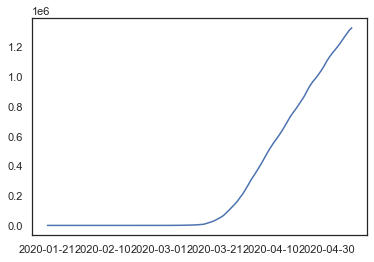

In [16]:
us_covid['confirmed'].plot.line()

# Analysis

## Which companies won and which companies lost?

We investigate the impact of COVID-19 on stock market by comparing prices before the outbreak in US.

In [17]:
def graph_comparing_stock_and_covid(ticker, field='Adj Close'):
    cp_stock = company_stock_data[ticker][field]
    cp_stock = cp_stock[(cp_stock.index >= '2020-01-21') & ((cp_stock.index <= '2020-04-30'))]
    dts=[str(x)[0:10] for x in cp_stock.index]
    us_covid_log_confirmed = np.log(us_covid[us_covid.index.isin(dts)]['confirmed'])

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(dts, cp_stock)
    ax1.set_ylabel(ticker)

    ax2 = ax1.twinx()
    ax2.plot(us_covid_log_confirmed.index, us_covid_log_confirmed, 'r-')
    ax2.set_ylabel('log confirmed', color='r')

    for tl in ax2.get_yticklabels():
        tl.set_color('r')

In [18]:
pre_covid_date = '2020-01-21'
cur_date = '2020-04-30'
company_return = {}
increased = []
steady = []
decreased = []
std = 0.05
for cp in sp_tickers:
    p1 = company_stock_data.loc[pre_covid_date, cp]['Adj Close']
    p2 = company_stock_data.loc[cur_date, cp]['Adj Close']
    delta = p2-p1
    rt = delta/p1

    if rt >= std:
        increased.append((cp,rt))
    elif rt <= -std:
        decreased.append((cp,rt))
    else:
        steady.append((cp,rt))
    company_return[cp] = rt

increased.sort(key=lambda x: -x[1])
steady.sort(key=lambda x: x[0])
decreased.sort(key=lambda x: x[1])
    

def add_covid_impact(x):
    x['covid_impact_return'] = company_return[x['symbol']]
    return x

companies = companies.apply(add_covid_impact, axis=1)

### Most Increased Stock Prices (Bull)

In [19]:
increased_sym = [x[0] for x in increased]
increased_companies = companies[companies['symbol'].isin(increased_sym)].copy()
print(f"Stock price of {len(increased)} companies increased by more than {std * 100:.2}%.")

increased_companies = increased_companies.sort_values(by=['covid_impact_return'], ascending=False)
display(increased_companies)

Stock price of 34 companies increased by more than 5.0%.


symbol                          security sec_filings  \
400   REGN         Regeneron Pharmaceuticals     reports   
82     COG                   Cabot Oil & Gas     reports   
338    NEM               Newmont Corporation     reports   
215   GILD                   Gilead Sciences     reports   
350   NLOK                    NortonLifeLock     reports   
27    AMZN                   Amazon.com Inc.     reports   
336   NFLX                      Netflix Inc.     reports   
250   INCY                            Incyte     reports   
113   CTXS                    Citrix Systems     reports   
304   MKTX                       MarketAxess     reports   
146    DLR          Digital Realty Trust Inc     reports   
114    CLX                The Clorox Company     reports   
354   NVDA                Nvidia Corporation     reports   
331   MSCI                          MSCI Inc     reports   
173   EQIX                           Equinix     reports   
412   SBAC                SBA Communications     reports   
417    NOW                        ServiceNow     reports   
164   EBAY                         eBay Inc.     reports   
282     KR                        Kroger Co.     reports   
406    ROL                      Rollins Inc.     reports   
151     DG                    Dollar General     reports   
212    GIS                     General Mills     reports   
292    LLY                 Lilly (Eli) & Co.     reports   
264   JKHY           Jack Henry & Associates     reports   
83    CDNS            Cadence Design Systems     reports   
447   TSCO            Tractor Supply Company     reports   
133    CCI  Crown Castle International Corp.     reports   
321   MSFT                   Microsoft Corp.     reports   
267    SJM                        JM Smucker     reports   
473   VRTX        Vertex Pharmaceuticals Inc     reports   
434   TMUS                       T-Mobile US     reports   
358   ODFL         Old Dominion Freight Line     reports   
368   PYPL                            PayPal     reports   
480    WMT                           Walmart     reports   

                gics_sector                      gics_sub_industry  \
400             Health Care                          Biotechnology   
82                   Energy     Oil & Gas Exploration & Production   
338               Materials                                   Gold   
215             Health Care                          Biotechnology   
350  Information Technology                   Application Software   
27   Consumer Discretionary     Internet & Direct Marketing Retail   
336  Communication Services                 Movies & Entertainment   
250             Health Care                          Biotechnology   
113  Information Technology                   Application Software   
304              Financials             Financial Exchanges & Data   
146             Real Estate                      Specialized REITs   
114        Consumer Staples                     Household Products   
354  Information Technology                         Semiconductors   
331              Financials             Financial Exchanges & Data   
173             Real Estate                      Specialized REITs   
412             Real Estate                      Specialized REITs   
417  Information Technology                       Systems Software   
164  Consumer Discretionary     Internet & Direct Marketing Retail   
282        Consumer Staples                            Food Retail   
406             Industrials    Environmental & Facilities Services   
151  Consumer Discretionary             General Merchandise Stores   
212        Consumer Staples                 Packaged Foods & Meats   
292             Health Care                        Pharmaceuticals   
264  Information Technology  Data Processing & Outsourced Services   
83   Information Technology                   Application Software   
447  Consumer Discretionary                       Specialty Stores   
133          

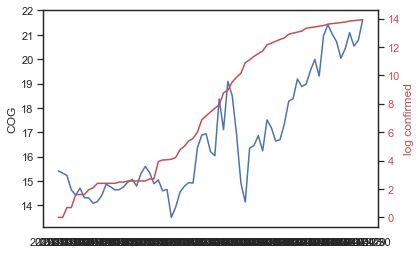

In [20]:
graph_comparing_stock_and_covid('COG')

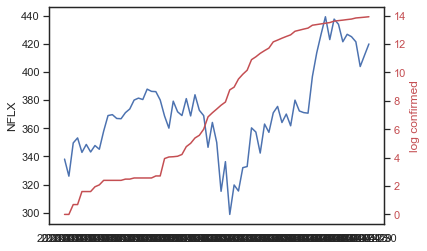

In [21]:
graph_comparing_stock_and_covid('NFLX')

### Most Decreased Stock Prices (Bear)

In [22]:
decreased_sym = [x[0] for x in decreased]
decreased_companies = companies[companies['symbol'].isin(decreased_sym)].copy()
print(f"Stock price of {len(decreased)} companies decreased by more than {std * 100:.2}%.")

decreased_companies = decreased_companies.sort_values(by=['covid_impact_return'], ascending=True)
display(decreased_companies)

Stock price of 404 companies decreased by more than 5.0%.


symbol                                security sec_filings  \
351   NCLH          Norwegian Cruise Line Holdings     reports   
89     CCL                          Carnival Corp.     reports   
460    UAL                United Airlines Holdings     reports   
409    RCL             Royal Caribbean Cruises Ltd     reports   
357    OXY                    Occidental Petroleum     reports   
360    OKE                                   ONEOK     reports   
46     APA                      Apache Corporation     reports   
280    KSS                            Kohl's Corp.     reports   
86    CPRI                          Capri Holdings     reports   
345    NBL                        Noble Energy Inc     reports   
142    DAL                    Delta Air Lines Inc.     reports   
30     AAL                 American Airlines Group     reports   
221    HAL                         Halliburton Co.     reports   
21     ADS                   Alliance Data Systems     reports   
474   VIAC                               ViacomCBS     reports   
72      BA                          Boeing Company     reports   
419    SPG                Simon Property Group Inc     reports   
228     HP                       Helmerich & Payne     reports   
413    SLB                       Schlumberger Ltd.     reports   
207    GPS                                Gap Inc.     reports   
440    FTI                              TechnipFMC     reports   
302    MRO                      Marathon Oil Corp.     reports   
260    IVZ                            Invesco Ltd.     reports   
346    JWN                               Nordstrom     reports   
145   FANG                      Diamondback Energy     reports   
33     AIG            American International Group     reports   
390    PVH                               PVH Corp.     reports   
14     ALK                    Alaska Air Group Inc     reports   
144    DVN                            Devon Energy     reports   
132   COTY                              Coty, Inc      reports   
458     UA                    Under Armour Class C     reports   
497    XRX                                   Xerox     reports   
457    UAA                    Under Armour Class A     reports   
147    DFS             Discover Financial Services     reports   
318    MGM               MGM Resorts International     reports   
160    DXC                          DXC Technology     reports   
437    TPR                         Tapestry, Inc.      reports   
121    CMA                           Comerica Inc.     reports   
334    NOV             National Oilwell Varco Inc.     reports   
329    MOS                      The Mosaic Company     reports   
277    KIM                            Kimco Realty     reports   
431    SYF                     Synchrony Financial     reports   
469    VTR                              Ventas Inc     reports   
199      F                      Ford Motor Company     reports   
449    TDG                         TransDigm Group     reports   
171    EOG                           EOG Resources     reports   
197    FLS                   Flowserve Corporation     reports   
112    CFG                Citizens Financial Group     reports   
303    MPC                      Marathon Petroleum     reports   
443    TXT                            Textron Inc.     reports   
421    SLG                         SL Green Realty     reports   
211     GE                        General Electric     reports   
424    LUV                      Southwest Airlines     reports   
487   WELL                          Welltower Inc.     reports   
283     LB                           L Brands Inc.     reports   
295    LYV               Live Nation Entertainment     reports   
486    WFC                             Wells Fargo     reports   
274    KEY                                 KeyCorp     reports   
495   WYNN                        Wynn Resorts Ltd     reports   
378    PXD               Pioneer Natural Res

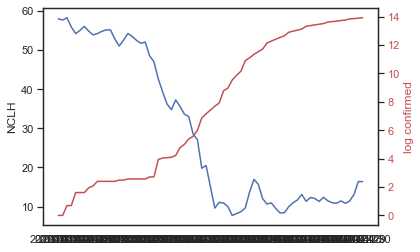

In [23]:
graph_comparing_stock_and_covid('NCLH')

In [24]:
industries = companies.groupby(['gics_sub_industry']).mean().drop(labels='cik', axis=1)
increased_industries = industries[industries['covid_impact_return'] > 0]
decreased_industries = industries[industries['covid_impact_return'] < 0]

display(increased_industries.sort_values(by=['covid_impact_return'], ascending=False))

covid_impact_return
gics_sub_industry                                       
Gold                                            0.364629
Biotechnology                                   0.159049
Food Retail                                     0.118876
Wireless Telecommunication Services             0.070340
Systems Software                                0.039441
Household Products                              0.029262
Application Software                            0.022260
Hypermarkets & Super Centers                    0.013858
Financial Exchanges & Data                      0.000388

In [25]:
display(decreased_industries.sort_values(by=['covid_impact_return'], ascending=True))

covid_impact_return
gics_sub_industry                                                
Hotels, Resorts & Cruise Lines                          -0.543506
Oil & Gas Drilling                                      -0.542967
Airlines                                                -0.538103
Department Stores                                       -0.520726
Oil & Gas Equipment & Services                          -0.491642
Oil & Gas Exploration & Production                      -0.399933
Consumer Finance                                        -0.396661
Automobile Manufacturers                                -0.396565
Casinos & Gaming                                        -0.390468
Retail REITs                                            -0.388174
Apparel, Accessories & Luxury Goods                     -0.379178
Health Care REITs                                       -0.377760
Reinsurance                                             -0.377569
Motorcycle Manufacturers                                -0.371131
Diversified Banks                                       -0.360133
Apparel Retail                                          -0.343530
Home Furnishings                                        -0.342053
Oil & Gas Storage & Transportation                      -0.329333
Oil & Gas Refining & Marketing                          -0.319917
Food Distributors                                       -0.316577
Regional Banks                                          -0.316453
Broadcasting                                            -0.310210
Life & Health Insurance                                 -0.307692
Publishing                                              -0.306980
Specialized Consumer Services                           -0.305600
Multi-line Insurance                                    -0.300433
Leisure Products                                        -0.299320
Housewares & Specialties                                -0.297998
Real Estate Services                                    -0.297381
Aerospace & Defense                                     -0.293991
Commodity Chemicals                                     -0.290942
Hotel & Resort REITs                                    -0.287538
Advertising                                             -0.284026
Copper                                                  -0.280359
Office REITs                                            -0.276514
Technology Hardware, Storage & Peripherals              -0.274076
Movies & Entertainment                                  -0.269471
Property & Casualty Insurance                           -0.269444
Brewers                                                 -0.265810
Alternative Carriers                                    -0.263881
Auto Parts & Equipment                                  -0.262198
Household Appliances                                    -0.255448
Integrated Oil & Gas                                    -0.255151
Personal Products                                       -0.244597
Construction Materials                                  -0.244485
Human Resource & Employment Services                    -0.240284
Asset Management & Custody Banks                        -0.239917
Investment Banking & Brokerage                          -0.238027
Health Care Supplies                                    -0.236159
Distributors                                            -0.236050
Fertilizers & Agricultural Chemicals                    -0.235136
Homebuilding                                            -0.233340
Independent Power Producers & Energy Traders            -0.228165
Residential REITs                                       -0.222657
Industrial Conglomerates                                -0.217527
Electronic Components                                   -0.217416
Steel                                                   -0.203711
Diversified Support Services                            -0.200503
Construction Machinery & Heavy Trucks                   -0.194648
Industrial Machinery

In [26]:
steady_sym = [x[0] for x in steady]
steady_companies = companies[companies['symbol'].isin(steady_sym)].copy()
print(f"Stock price of {len(steady)} companies steady within +- 5%")

steady_companies = steady_companies.sort_values(by=['covid_impact_return'], ascending=True)
display(steady_companies)

Stock price of 67 companies steady within +- 5%


symbol                         security sec_filings  \
17    ALXN          Alexion Pharmaceuticals     reports   
327    MCO                     Moody's Corp     reports   
57    ADSK                    Autodesk Inc.     reports   
71     BLK                        BlackRock     reports   
42    ANSS                            ANSYS     reports   
12     APD     Air Products & Chemicals Inc     reports   
16     ARE  Alexandria Real Estate Equities     reports   
290   LDOS                  Leidos Holdings     reports   
374    PFE                      Pfizer Inc.     reports   
403    RMD                           ResMed     reports   
472     VZ           Verizon Communications     reports   
135    CMI                     Cummins Inc.     reports   
361   ORCL                     Oracle Corp.     reports   
276    KMB                   Kimberly-Clark     reports   
182   EXPD                       Expeditors     reports   
438    TGT                     Target Corp.     reports   
106    CHD                  Church & Dwight     reports   
496    XEL                  Xcel Energy Inc     reports   
131   COST           Costco Wholesale Corp.     reports   
158    DRE                 Duke Realty Corp     reports   
249   ILMN                     Illumina Inc     reports   
246   IDXX               IDEXX Laboratories     reports   
470   VRSN                    Verisign Inc.     reports   
66     BAX        Baxter International Inc.     reports   
461    UNH         United Health Group Inc.     reports   
257    IFF        Intl Flavors & Fragrances     reports   
20     AGN                   Allergan, plc      reports   
102   CHTR           Charter Communications     reports   
37     ABC           AmerisourceBergen Corp     reports   
140    DVA                      DaVita Inc.     reports   
410   SPGI                S&P Global, Inc.      reports   
52    ANET                  Arista Networks     reports   
165    ECL                      Ecolab Inc.     reports   
444    TMO         Thermo Fisher Scientific     reports   
281    KHC                   Kraft Heinz Co     reports   
252   INTC                      Intel Corp.     reports   
119     CL                Colgate-Palmolive     reports   
138    DHR                    Danaher Corp.     reports   
238    HRL               Hormel Foods Corp.     reports   
3     ABMD                      ABIOMED Inc     reports   
333   NDAQ                    Nasdaq, Inc.      reports   
104    CMG           Chipotle Mexican Grill     reports   
34     AMT             American Tower Corp.     reports   
6     ADBE                       Adobe Inc.     reports   
268    JNJ                Johnson & Johnson     reports   
384    PGR                Progressive Corp.     reports   
39    AMGN                       Amgen Inc.     reports   
168     EA                  Electronic Arts     reports   
96     CNC              Centene Corporation     reports   
432   SNPS                    Synopsys Inc.     reports   
187   FAST                      Fastenal Co     reports   
7      AMD       Advanced Micro Devices Inc     reports   
13    AKAM          Akamai Technologies Inc     reports   
1      ABT              Abbott Laboratories     reports   
185   FFIV                      F5 Networks     reports   
70    BIIB                      Biogen Inc.     reports   
122    CAG                   Conagra Brands     reports   
394    DGX                Quest Diagnostics     reports   
84     CPB                    Campbell Soup     reports   
5     ATVI              Activision Blizzard     reports   
242    HUM                      Humana Inc.     reports   
68   BRK.B               Berkshire Hathaway     reports   
80    BF.B               Brown-Forman Corp.     reports   
90    CARR                   Carrier Global     reports   
240    HWM                 Howmet Aerospace     reports   
362   OTIS                   Otis Worldwide     reports   
448     TT           Trane Technologies plc     rep

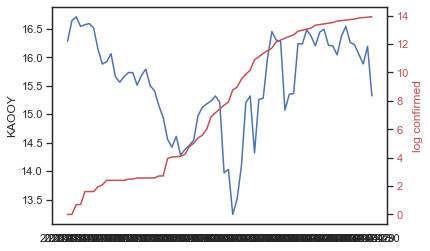

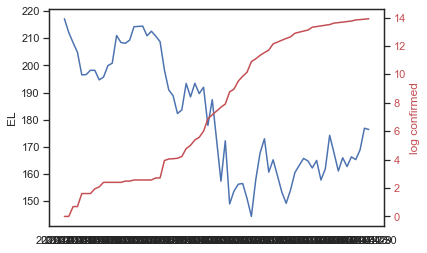

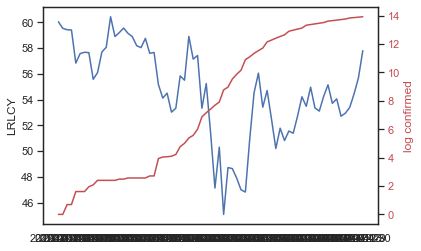

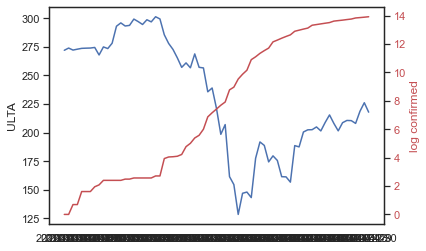

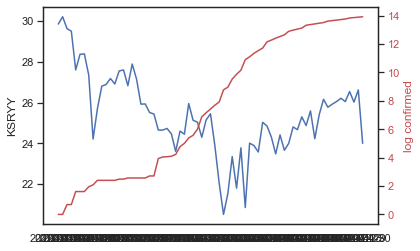

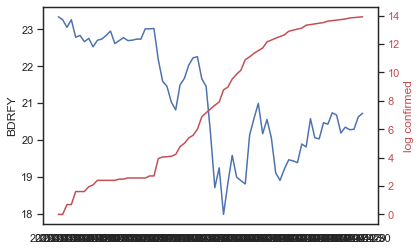

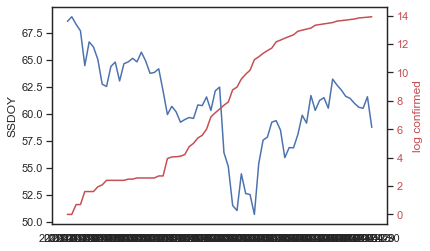

In [27]:
for t in cosmetic_tickers:
    graph_comparing_stock_and_covid(t)

## Which industry vary the most?

In [28]:
maxval = companies.groupby(['gics_sub_industry']).agg({'covid_impact_return': 'max'})
maxval.columns = ['max']
minval = companies.groupby(['gics_sub_industry']).agg({'covid_impact_return': 'min'})
minval.columns = ['min']

diff = maxval.join(minval, how='inner')
diff['diff'] = diff['max'] - diff['min']
diff.sort_values(by=['diff'], ascending=False)

max       min      diff
gics_sub_industry                                                         
Oil & Gas Exploration & Production            0.402128 -0.614101  1.016230
Movies & Entertainment                        0.241756 -0.547624  0.789380
General Merchandise Stores                    0.115209 -0.585004  0.700212
Internet & Direct Marketing Retail            0.307611 -0.353329  0.660940
Data Processing & Outsourced Services         0.096226 -0.549635  0.645861
Apparel, Accessories & Luxury Goods          -0.053071 -0.584129  0.531058
Property & Casualty Insurance                 0.012717 -0.501626  0.514342
Biotechnology                                 0.445877 -0.049022  0.494899
Specialized REITs                             0.198340 -0.281316  0.479656
Asset Management & Custody Banks             -0.044017 -0.521364  0.477348
Aerospace & Defense                          -0.081302 -0.547311  0.466009
Oil & Gas Storage & Transportation           -0.136635 -0.587620  0.450986
Application Software                          0.320398 -0.129295  0.449692
Personal Products                            -0.053366 -0.492663  0.439297
Packaged Foods & Meats                        0.111787 -0.325508  0.437295
IT Consulting & Other Services               -0.039381 -0.471465  0.432084
Technology Hardware, Storage & Peripherals   -0.069725 -0.485832  0.416108
Hotels, Resorts & Cruise Lines               -0.314535 -0.716997  0.402463
Fertilizers & Agricultural Chemicals         -0.054070 -0.454188  0.400118
Industrial Machinery                         -0.036727 -0.426843  0.390117
Financial Exchanges & Data                    0.229630 -0.150899  0.380529
Office REITs                                 -0.039891 -0.418620  0.378729
Semiconductors                                0.179539 -0.194213  0.373752
Restaurants                                   0.008981 -0.355827  0.364808
Specialty Chemicals                          -0.007843 -0.341972  0.334129
Building Products                             0.025086 -0.307881  0.332968
Multi-Utilities                              -0.030732 -0.362668  0.331935
Pharmaceuticals                               0.103126 -0.225404  0.328530
Apparel Retail                               -0.209771 -0.535525  0.325755
Regional Banks                               -0.106356 -0.425746  0.319390
Industrial Conglomerates                     -0.096942 -0.416230  0.319288
Specialty Stores                              0.087034 -0.232013  0.319046
Cable & Satellite                            -0.016601 -0.319184  0.302583
Environmental & Facilities Services           0.117927 -0.165557  0.283485
Retail REITs                                 -0.282852 -0.545349  0.262498
Health Care Facilities                       -0.011139 -0.269915  0.258776
Health Care Equipment                         0.030623 -0.227528  0.258150
Research & Consulting Services               -0.050821 -0.303466  0.252645
Airlines                                     -0.414078 -0.655205  0.241127
Independent Power Producers & Energy Traders -0.114792 -0.341539  0.226746
Household Products                            0.186193 -0.035295  0.221488
Health Care Distributors                     -0.013097 -0.232569  0.219472
Electric Utilities                           -0.067041 -0.285061  0.218019
Communications Equipment                      0.031250 -0.183999  0.215249
Systems Software                              0.123203 -0.084155  0.207358
Electrical Components & Equipment            -0.056218 -0.256819  0.200601
Multi-line Insurance                         -0.188665 -0.386448  0.197783
Health Care Services                          0.033699 -0.162302  0.196001
Internet Services & Infrastructure            0.029068 -0.162330  0.191398
Investment Banking & Brokerage               -0.124745 -0.313939  0.189194
Trucking                                      0.062145 -0.125116  0.187261
Consumer Finance                             -0.297044 -0.483480  0.186436
C

In [29]:
companies[(companies['gics_sub_industry'] == 'Movies & Entertainment')].sort_values(by=['covid_impact_return'], ascending=False)

symbol                   security sec_filings             gics_sector  \
336   NFLX               Netflix Inc.     reports  Communication Services   
482    DIS    The Walt Disney Company     reports  Communication Services   
204    FOX    Fox Corporation Class B     reports  Communication Services   
203   FOXA    Fox Corporation Class A     reports  Communication Services   
295    LYV  Live Nation Entertainment     reports  Communication Services   
474   VIAC                  ViacomCBS     reports  Communication Services   

          gics_sub_industry       headquarters_location date_first_added  \
336  Movies & Entertainment      Los Gatos, California        2010/12/20   
482  Movies & Entertainment        Burbank, California        1976/06/30   
204  Movies & Entertainment         New York, New York        2015/09/18   
203  Movies & Entertainment         New York, New York        2013/07/01   
295  Movies & Entertainment  Beverly Hills, California        2019/12/23   
474  Movies & Entertainment         New York, New York               NaN   

         cik founded  covid_impact_return  
336  1065280    1997             0.241756  
482  1001039     NaN            -0.246656  
204  1308161     NaN            -0.329699  
203  1308161     NaN            -0.333590  
295  1335258    2010            -0.401015  
474  1339947     NaN            -0.547624

In [30]:
companies[(companies['gics_sub_industry'] == 'Oil & Gas Exploration & Production')].sort_values(by=['covid_impact_return'], ascending=False)

symbol                   security sec_filings gics_sector  \
82     COG            Cabot Oil & Gas     reports      Energy   
124    COP             ConocoPhillips     reports      Energy   
123    CXO           Concho Resources     reports      Energy   
378    PXD  Pioneer Natural Resources     reports      Energy   
171    EOG              EOG Resources     reports      Energy   
144    DVN               Devon Energy     reports      Energy   
145   FANG         Diamondback Energy     reports      Energy   
302    MRO         Marathon Oil Corp.     reports      Energy   
345    NBL           Noble Energy Inc     reports      Energy   
46     APA         Apache Corporation     reports      Energy   
357    OXY       Occidental Petroleum     reports      Energy   

                      gics_sub_industry     headquarters_location  \
82   Oil & Gas Exploration & Production           Houston, Texas    
124  Oil & Gas Exploration & Production           Houston, Texas    
123  Oil & Gas Exploration & Production           Midland, Texas    
378  Oil & Gas Exploration & Production            Irving, Texas    
171  Oil & Gas Exploration & Production           Houston, Texas    
144  Oil & Gas Exploration & Production  Oklahoma City, Oklahoma    
145  Oil & Gas Exploration & Production           Midland, Texas    
302  Oil & Gas Exploration & Production           Houston, Texas    
345  Oil & Gas Exploration & Production           Houston, Texas    
46   Oil & Gas Exploration & Production           Houston, Texas    
357  Oil & Gas Exploration & Production           Houston, Texas    

    date_first_added      cik founded  covid_impact_return  
82        2008/06/23   858470     NaN             0.402128  
124              NaN  1163165    2002            -0.337842  
123       2016/02/22  1358071     NaN            -0.354303  
378       2008/09/24  1038357     NaN            -0.388997  
171       2000/11/02   821189     NaN            -0.429609  
144       2000/08/30  1090012     NaN            -0.495603  
145       2018/12/03  1539838    2007            -0.504020  
302       1991/05/01   101778     NaN            -0.521487  
345       2007/10/08    72207     NaN            -0.568745  
46        1997/07/28     6769    1954            -0.586683  
357       1982/12/31   797468     NaN            -0.614101

In [31]:
companies[companies['gics_sub_industry'].str.contains('Personal Products')].sort_values(by=['covid_impact_return'], ascending=False)

symbol                security sec_filings       gics_sector  \
383     PG        Procter & Gamble     reports  Consumer Staples   
176     EL  Estée Lauder Companies     reports  Consumer Staples   
132   COTY              Coty, Inc      reports  Consumer Staples   

     gics_sub_industry headquarters_location date_first_added      cik  \
383  Personal Products     Cincinnati, Ohio               NaN    80424   
176  Personal Products   New York, New York        2006/01/05  1001250   
132  Personal Products   New York, New York        2016/10/03  1024305   

    founded  covid_impact_return  
383    1837            -0.053366  
176     NaN            -0.187763  
132     NaN            -0.492663

## Pytrends

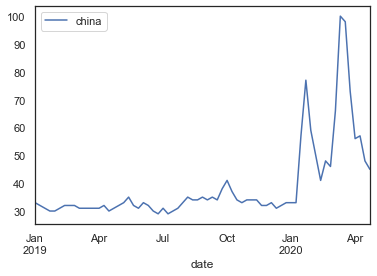

In [32]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["china"]
pytrends.build_payload(kw_list, cat=0, timeframe='2019-01-01 2020-05-01', geo='', gprop='')
interests = pytrends.interest_over_time()
interests.plot.line()

## Mobility Data Analysis

In [33]:
mobility = pd.read_csv("../../data/mobility.csv")

/Users/leek1211/.local/share/virtualenvs/python-I30B4_fg/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
us_mobility = mobility[(mobility['sub_region_1'].isnull()) & (mobility['country_region_code'] == 'US') & (mobility['date'].notnull())].copy()
print(f"US Mobility data from {us_mobility['date'].min()} to {us_mobility['date'].max()}")

us_mobility.columns =[column.replace("_percent_change_from_baseline", "_mobility").lower() for column in us_mobility.columns]
us_mobility['date'] = pd.to_datetime(us_mobility['date']) 

us_mobility

US Mobility data from 2020-02-15 to 2020-05-02


country_region_code country_region sub_region_1 sub_region_2       date  \
94913                  US  United States          NaN          NaN 2020-02-15   
94914                  US  United States          NaN          NaN 2020-02-16   
94915                  US  United States          NaN          NaN 2020-02-17   
94916                  US  United States          NaN          NaN 2020-02-18   
94917                  US  United States          NaN          NaN 2020-02-19   
94918                  US  United States          NaN          NaN 2020-02-20   
94919                  US  United States          NaN          NaN 2020-02-21   
94920                  US  United States          NaN          NaN 2020-02-22   
94921                  US  United States          NaN          NaN 2020-02-23   
94922                  US  United States          NaN          NaN 2020-02-24   
94923                  US  United States          NaN          NaN 2020-02-25   
94924                  US  United States          NaN          NaN 2020-02-26   
94925                  US  United States          NaN          NaN 2020-02-27   
94926                  US  United States          NaN          NaN 2020-02-28   
94927                  US  United States          NaN          NaN 2020-02-29   
94928                  US  United States          NaN          NaN 2020-03-01   
94929                  US  United States          NaN          NaN 2020-03-02   
94930                  US  United States          NaN          NaN 2020-03-03   
94931                  US  United States          NaN          NaN 2020-03-04   
94932                  US  United States          NaN          NaN 2020-03-05   
94933                  US  United States          NaN          NaN 2020-03-06   
94934                  US  United States          NaN          NaN 2020-03-07   
94935                  US  United States          NaN          NaN 2020-03-08   
94936                  US  United States          NaN          NaN 2020-03-09   
94937                  US  United States          NaN          NaN 2020-03-10   
94938                  US  United States          NaN          NaN 2020-03-11   
94939                  US  United States          NaN          NaN 2020-03-12   
94940                  US  United States          NaN          NaN 2020-03-13   
94941                  US  United States          NaN          NaN 2020-03-14   
94942                  US  United States          NaN          NaN 2020-03-15   
94943                  US  United States          NaN          NaN 2020-03-16   
94944                  US  United States          NaN          NaN 2020-03-17   
94945                  US  United States          NaN          NaN 2020-03-18   
94946                  US  United States          NaN          NaN 2020-03-19   
94947                  US  United States          NaN          NaN 2020-03-20   
94948                  US  United States          NaN          NaN 2020-03-21   
94949                  US  United States          NaN          NaN 2020-03-22   
94950                  US  United States          NaN          NaN 2020-03-23   
94951                  US  United States          NaN          NaN 2020-03-24   
94952                  US  United States          NaN          NaN 2020-03-25   
94953                  US  United States          NaN          NaN 2020-03-26   
94954                  US  United States          NaN          NaN 2020-03-27   
94955                  US  United States          NaN          NaN 2020-03-28   
94956                  US  United States          NaN          NaN 2020-03-29   
94957                  US  United States          NaN          NaN 2020-03-30   
94958                  US  United States          NaN          NaN 2020-03-31   
94959                  US  United States          NaN          NaN 2020-04-01   
94960                  US  United States          NaN          NaN 2020-04-02   
94961                  US  United Sta

(array([18307, 18322, 18353, 18383, 18384]),
 <a list of 5 Text major ticklabel objects>)

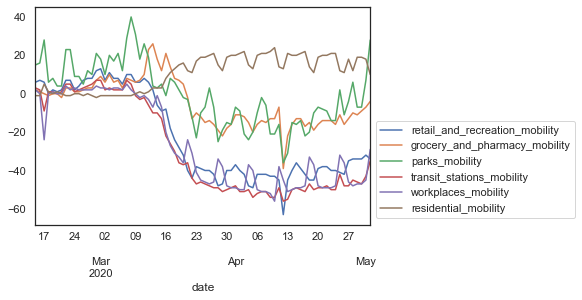

In [55]:
# us_mobility[us_mobility['date']=='2020-02-15']
us_mobility.plot.line(
    x='date',
    y=['retail_and_recreation_mobility', 'grocery_and_pharmacy_mobility', 'parks_mobility', 'transit_stations_mobility', 'workplaces_mobility', 'residential_mobility']
).legend(bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=0)


In [56]:
stock_mobility = pd.merge(us_mobility, stock_data['Adj Close'], left_on='date', right_index=True, how='inner')

In [57]:
cor_matrix = stock_mobility.corr()
corr_dict = dict(cor_matrix['workplaces_mobility'])
#cor_matrix['workplaces_percent_change_from_baseline'].sort_values(ascending=False)

In [58]:
cp = companies.copy()

def add_corr(x):
    x['mobility_corr'] = corr_dict[x['symbol']]
    return x
cp = cp.apply(add_corr, axis=1)
cp[cp['covid_impact_return'] > 0].sort_values('mobility_corr', ascending=False)

symbol                          security sec_filings  \
394    DGX                 Quest Diagnostics     reports   
417    NOW                        ServiceNow     reports   
406    ROL                      Rollins Inc.     reports   
6     ADBE                        Adobe Inc.     reports   
434   TMUS                       T-Mobile US     reports   
187   FAST                       Fastenal Co     reports   
333   NDAQ                     Nasdaq, Inc.      reports   
164   EBAY                         eBay Inc.     reports   
368   PYPL                            PayPal     reports   
70    BIIB                       Biogen Inc.     reports   
133    CCI  Crown Castle International Corp.     reports   
264   JKHY           Jack Henry & Associates     reports   
34     AMT              American Tower Corp.     reports   
104    CMG            Chipotle Mexican Grill     reports   
384    PGR                 Progressive Corp.     reports   
242    HUM                       Humana Inc.     reports   
432   SNPS                     Synopsys Inc.     reports   
84     CPB                     Campbell Soup     reports   
321   MSFT                   Microsoft Corp.     reports   
185   FFIV                       F5 Networks     reports   
447   TSCO            Tractor Supply Company     reports   
268    JNJ                 Johnson & Johnson     reports   
358   ODFL         Old Dominion Freight Line     reports   
412   SBAC                SBA Communications     reports   
354   NVDA                Nvidia Corporation     reports   
3     ABMD                       ABIOMED Inc     reports   
331   MSCI                          MSCI Inc     reports   
350   NLOK                    NortonLifeLock     reports   
168     EA                   Electronic Arts     reports   
7      AMD        Advanced Micro Devices Inc     reports   
5     ATVI               Activision Blizzard     reports   
1      ABT               Abbott Laboratories     reports   
83    CDNS            Cadence Design Systems     reports   
96     CNC               Centene Corporation     reports   
151     DG                    Dollar General     reports   
173   EQIX                           Equinix     reports   
39    AMGN                        Amgen Inc.     reports   
336   NFLX                      Netflix Inc.     reports   
13    AKAM           Akamai Technologies Inc     reports   
282     KR                        Kroger Co.     reports   
473   VRTX        Vertex Pharmaceuticals Inc     reports   
250   INCY                            Incyte     reports   
292    LLY                 Lilly (Eli) & Co.     reports   
267    SJM                        JM Smucker     reports   
338    NEM               Newmont Corporation     reports   
27    AMZN                   Amazon.com Inc.     reports   
146    DLR          Digital Realty Trust Inc     reports   
304   MKTX                       MarketAxess     reports   
212    GIS                     General Mills     reports   
480    WMT                           Walmart     reports   
122    CAG                    Conagra Brands     reports   
215   GILD                   Gilead Sciences     reports   
238    HRL                Hormel Foods Corp.     reports   
400   REGN         Regeneron Pharmaceuticals     reports   
114    CLX                The Clorox Company     reports   
82     COG                   Cabot Oil & Gas     reports   
113   CTXS                    Citrix Systems     reports   

                gics_sector                      gics_sub_industry  \
394             Health Care                   Health Care Services   
417  Information Technology                       Systems Software   
406             Industrials    Environmental & Facilities Services   
6    Information Technology                   Application Software   
434  Communication Services    Wireless Telecommunication Services   
187             Industrials                      Building Products   
333              Financials      

In [59]:
cp[(cp['covid_impact_return'] < 0)].sort_values('mobility_corr', ascending=False)

symbol                                security sec_filings  \
188    FRT         Federal Realty Investment Trust     reports   
399    REG             Regency Centers Corporation     reports   
277    KIM                            Kimco Realty     reports   
142    DAL                    Delta Air Lines Inc.     reports   
398      O               Realty Income Corporation     reports   
421    SLG                         SL Green Realty     reports   
419    SPG                Simon Property Group Inc     reports   
497    XRX                                   Xerox     reports   
431    SYF                     Synchrony Financial     reports   
220    HRB                               H&R Block     reports   
280    KSS                            Kohl's Corp.     reports   
75     BXP                       Boston Properties     reports   
55       T                               AT&T Inc.     reports   
109   CTAS                      Cintas Corporation     reports   
449    TDG                         TransDigm Group     reports   
283     LB                           L Brands Inc.     reports   
19    ALLE                                Allegion     reports   
263    IRM              Iron Mountain Incorporated     reports   
323    MHK                       Mohawk Industries     reports   
147    DFS             Discover Financial Services     reports   
207    GPS                                Gap Inc.     reports   
389    PHM                              PulteGroup     reports   
395     RL                Ralph Lauren Corporation     reports   
483     WM                   Waste Management Inc.     reports   
269    JCI          Johnson Controls International     reports   
60     AVB            AvalonBay Communities, Inc.      reports   
15     ALB                          Albemarle Corp     reports   
179     RE                   Everest Re Group Ltd.     reports   
402    RSG                   Republic Services Inc     reports   
460    UAL                United Airlines Holdings     reports   
454    UDR                              UDR, Inc.      reports   
424    LUV                      Southwest Airlines     reports   
47     AIV       Apartment Investment & Management     reports   
346    JWN                               Nordstrom     reports   
359    OMC                           Omnicom Group     reports   
14     ALK                    Alaska Air Group Inc     reports   
85     COF                   Capital One Financial     reports   
241    HPQ                                 HP Inc.     reports   
89     CCL                          Carnival Corp.     reports   
260    IVZ                            Invesco Ltd.     reports   
222    HBI                         Hanesbrands Inc     reports   
223    HOG                         Harley-Davidson     reports   
322    MAA                  Mid-America Apartments     reports   
53     AJG               Arthur J. Gallagher & Co.     reports   
287     LW                Lamb Weston Holdings Inc     reports   
33     AIG            American International Group     reports   
21     ADS                   Alliance Data Systems     reports   
205    BEN                      Franklin Resources     reports   
199      F                      Ford Motor Company     reports   
72      BA                          Boeing Company     reports   
132   COTY                              Coty, Inc      reports   
305    MAR                         Marriott Int'l.     reports   
86    CPRI                          Capri Holdings     reports   
149  DISCK                  Discovery Inc. Class C     reports   
105     CB                           Chubb Limited     reports   
489     WU                        Western Union Co     reports   
360    OKE                                   ONEOK     reports   
390    PVH                               PVH Corp.     reports   
211     GE                        General Electric     reports   
422    SNA                                 S

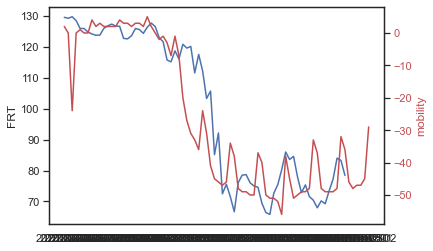

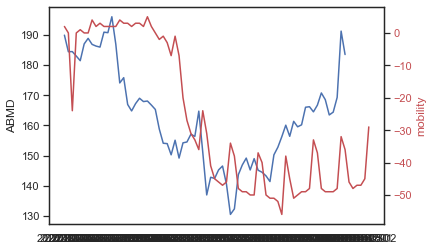

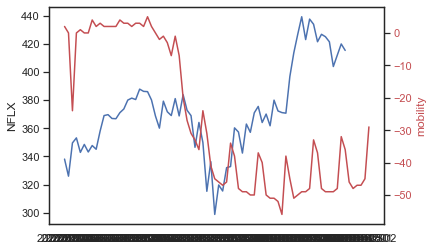

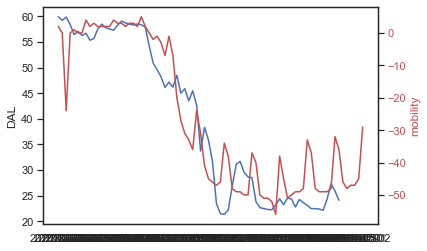

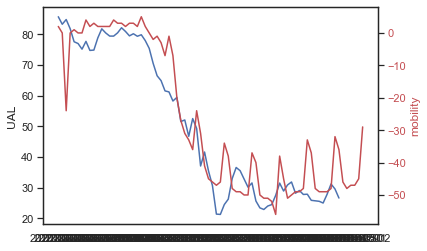

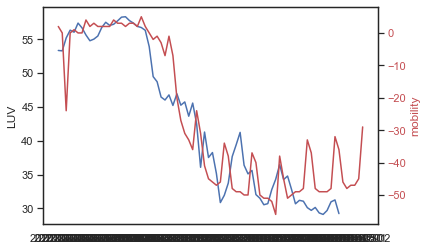

In [61]:
def graph_comparing_stock_and_mobility(ticker, field='Adj Close'):
    cp_stock = company_stock_data[ticker][field]
    cp_stock = cp_stock[(cp_stock.index >= '2020-01-21') & ((cp_stock.index <= '2020-05-02'))]
    
    dts=[str(x)[0:10] for x in cp_stock.index]

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(dts, cp_stock)
    ax1.set_ylabel(ticker)

    ax2 = ax1.twinx()
    dts=[str(x)[0:10] for x in us_mobility['date']]
    ax2.plot(dts, us_mobility['workplaces_mobility'], 'r-')
    
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    number_of_steps = 10
    len(cp_stock.index)
    

graph_comparing_stock_and_mobility('FRT')
graph_comparing_stock_and_mobility('ABMD')
graph_comparing_stock_and_mobility('NFLX')
graph_comparing_stock_and_mobility('DAL')
graph_comparing_stock_and_mobility('UAL')
graph_comparing_stock_and_mobility('LUV')


## Airline Companies Analysis

In [62]:
airline_companies = set(companies[companies['gics_sub_industry']=='Airlines']['symbol'])
# for t in airline_companies:
#     graph_comparing_stock_and_covid(t)
    
airline_companies

{'AAL', 'ALK', 'DAL', 'LUV', 'UAL'}

In [63]:
airline_stock_prices = stock_data['Adj Close'][['AAL', 'ALK', 'DAL', 'LUV', 'UAL']][42:].copy()
# airline_stock_prices.to_csv("airline_stock_prices.csv")
# us_covid.to_csv("us_covid.csv")
# us_mobility.to_csv("us_mobility.csv")

In [64]:
joined = pd.merge(pd.merge(airline_stock_prices, us_covid, left_index=True, right_index=True, how='left'), us_mobility, left_index=True, right_on='date', how='left')
joined.to_csv("airline.csv")

In [65]:
bpdf = companies[['gics_sub_industry', 'covid_impact_return']]
dd = bpdf.groupby('gics_sub_industry').mean().sort_values('covid_impact_return', ascending=False)
dd



covid_impact_return
gics_sub_industry                                                
Gold                                                     0.364629
Biotechnology                                            0.159049
Food Retail                                              0.118876
Wireless Telecommunication Services                      0.070340
Systems Software                                         0.039441
Household Products                                       0.029262
Application Software                                     0.022260
Hypermarkets & Super Centers                             0.013858
Financial Exchanges & Data                               0.000388
Interactive Home Entertainment                          -0.003580
Managed Health Care                                     -0.023419
Trucking                                                -0.031485
Specialized REITs                                       -0.031735
Industrial REITs                                        -0.043515
Internet & Direct Marketing Retail                      -0.045437
Metal & Glass Containers                                -0.051012
Internet Services & Infrastructure                      -0.052115
Packaged Foods & Meats                                  -0.058023
Pharmaceuticals                                         -0.058426
Environmental & Facilities Services                     -0.069367
Health Care Services                                    -0.071037
Life Sciences Tools & Services                          -0.071665
Communications Equipment                                -0.079150
Health Care Technology                                  -0.081963
Water Utilities                                         -0.083155
Industrial Gases                                        -0.084811
Home Improvement Retail                                 -0.089383
Semiconductors                                          -0.090398
Health Care Equipment                                   -0.094530
Interactive Media & Services                            -0.104285
Soft Drinks                                             -0.108803
Gas Utilities                                           -0.116079
Integrated Telecommunication Services                   -0.116202
Health Care Distributors                                -0.119172
Construction & Engineering                              -0.120867
Electronic Equipment & Instruments                      -0.124234
Air Freight & Logistics                                 -0.129740
Distillers & Vintners                                   -0.131005
Specialty Stores                                        -0.132485
Computer & Electronics Retail                           -0.141888
Electrical Components & Equipment                       -0.147929
Railroads                                               -0.150002
Research & Consulting Services                          -0.152079
Semiconductor Equipment                                 -0.152424
General Merchandise Stores                              -0.152964
Agricultural & Farm Machinery                           -0.154610
Insurance Brokers                                       -0.156049
Electric Utilities                                      -0.156332
Multi-Utilities                                         -0.158790
Restaurants                                             -0.159562
Data Processing & Outsourced Services                   -0.162493
Agricultural Products                                   -0.170386
Trading Companies & Distributors                        -0.170914
Building Products                                       -0.171321
IT Consulting & Other Services                          -0.173080
Health Care Facilities                                  -0.177420
Tobacco                                                 -0.178070
Cable & Satellite                                       -0.178345
Paper Packaging                                         -0.179473
Electronic Manufactu

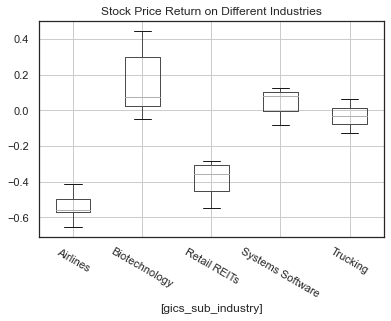

In [74]:
industries_of_interest = bpdf[bpdf['gics_sub_industry'].isin(['Biotechnology', 'Airlines', 'Systems Software', 'Trucking', 'Retail REITs'])]
#display(industries_of_interest)
industries_of_interest.boxplot(by='gics_sub_industry')
plt.title("Stock Price Return on Different Industries")
plt.suptitle('') # that's what you're after
plt.xticks(rotation=-30)
plt.show()


(10.0, 50.0)

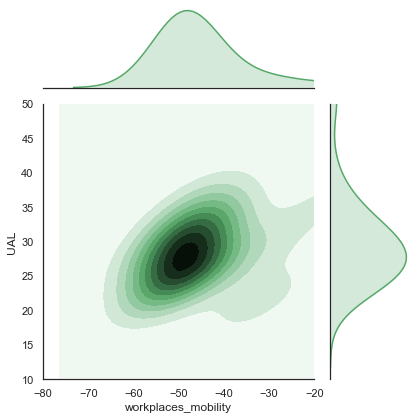

In [70]:
snsdf = joined[joined['workplaces_mobility'] < 0]
plot = sns.jointplot("workplaces_mobility", "UAL", data=snsdf, kind="kde", ratio=3, color="g")
plot.ax_marg_x.set_xlim(-80, -20)
plot.ax_marg_y.set_ylim(10, 50)